# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [29]:
time.ctime(1328448721)

'Sun Feb  5 08:32:01 2012'

### Generate the Cities List by Using the `citipy` Library

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
url = "http://api.openweathermap.org/data/2.5/weather?&appid="
api = "320aeabb7c7fa4381fb9ffe242757f06"
print(url+api)

city_url = url + api + '&q=' + "city" 
print(city_url)

http://api.openweathermap.org/data/2.5/weather?&appid=320aeabb7c7fa4381fb9ffe242757f06
http://api.openweathermap.org/data/2.5/weather?&appid=320aeabb7c7fa4381fb9ffe242757f06&q=city


In [32]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?&appid="
api = "320aeabb7c7fa4381fb9ffe242757f06"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = url + api + '&q=' + (city)

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    #try:
        # Parse the JSON and retrieve data
    city_weather = requests.get(city_url).json()
    print (json.dumps(city_weather, indent = 4, sort_keys = True))

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila franca do campo
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 37.7167,
        "lon": -25.4333
    },
    "dt": 1699665044,
    "id": 3372472,
    "main": {
        "feels_like": 296.17,
        "grnd_level": 1016,
        "humidity": 99,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 295.31,
        "temp_max": 295.31,
        "temp_min": 294.38
    },
    "name": "Vila Franca do Campo",
    "sys": {
        "country": "PT",
        "id": 131456,
        "sunrise": 1699690631,
        "sunset": 1699727662,
        "type": 2
    },
    "timezone": -3600,
    "visibility": 7692,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 221,
        "gust": 14.6,
    

{
    "base": "stations",
    "clouds": {
        "all": 43
    },
    "cod": 200,
    "coord": {
        "lat": -33.5906,
        "lon": 26.891
    },
    "dt": 1699665044,
    "id": 964432,
    "main": {
        "feels_like": 291.85,
        "humidity": 91,
        "pressure": 1006,
        "temp": 291.58,
        "temp_max": 291.58,
        "temp_min": 291.58
    },
    "name": "Port Alfred",
    "sys": {
        "country": "ZA",
        "id": 2072861,
        "sunrise": 1699671864,
        "sunset": 1699721312,
        "type": 2
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 257,
        "gust": 7.15,
        "speed": 3.13
    }
}
Processing Record 5 of Set 1 | san bernardo del viento
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord":

In [33]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?&appid="
api = "320aeabb7c7fa4381fb9ffe242757f06"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = url + api + '&units=imperial&q=' + (city)

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity =city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.ctime(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vila franca do campo
Processing Record 2 of Set 1 | ribeira brava
Processing Record 3 of Set 1 | benghazi
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | san bernardo del viento
Processing Record 6 of Set 1 | kolin
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | flin flon
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | banda aceh
Processing Record 14 of Set 1 | singaraja
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | novyy urgal
Processing Record 18 of Set 1 | rawson
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | swift current
Processing Record 21 of Set 1 | west island
Processing Record 22 of Set 1 | gr

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.7167,-25.4333,71.89,99,100,17.96,PT,Fri Nov 10 20:10:44 2023
1,ribeira brava,32.6500,-17.0667,69.12,78,65,3.62,PT,Fri Nov 10 20:10:44 2023
2,benghazi,32.1167,20.0667,72.00,54,0,4.63,LY,Fri Nov 10 20:10:12 2023
3,port alfred,-33.5906,26.8910,65.17,91,43,7.00,ZA,Fri Nov 10 20:11:38 2023
4,san bernardo del viento,9.3533,-75.9524,82.17,85,100,5.19,CO,Fri Nov 10 20:11:38 2023


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila franca do campo,37.7167,-25.4333,71.89,99,100,17.96,PT,Fri Nov 10 20:10:44 2023
1,ribeira brava,32.6500,-17.0667,69.12,78,65,3.62,PT,Fri Nov 10 20:10:44 2023
2,benghazi,32.1167,20.0667,72.00,54,0,4.63,LY,Fri Nov 10 20:10:12 2023
3,port alfred,-33.5906,26.8910,65.17,91,43,7.00,ZA,Fri Nov 10 20:11:38 2023
4,san bernardo del viento,9.3533,-75.9524,82.17,85,100,5.19,CO,Fri Nov 10 20:11:38 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

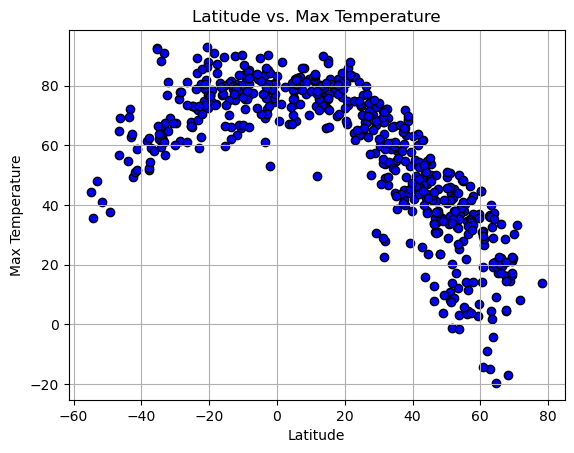

In [38]:
# Build scatter plot for latitude vs. temperature 
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

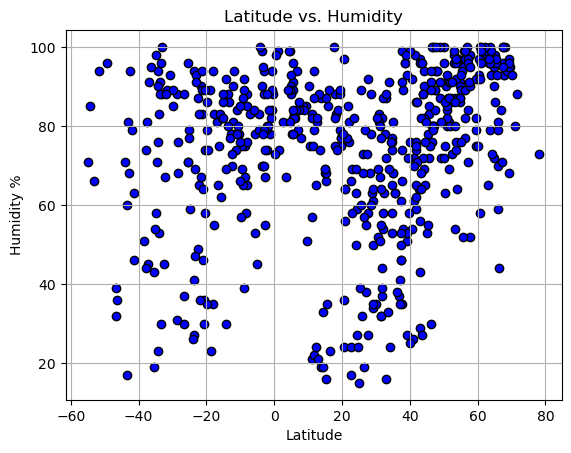

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', facecolors='blue', edgecolors='black')


# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

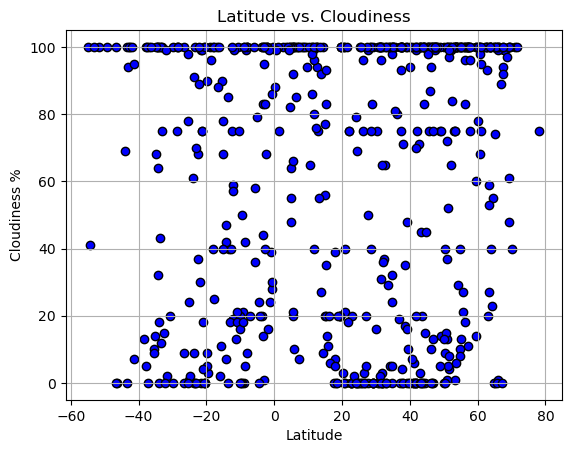

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

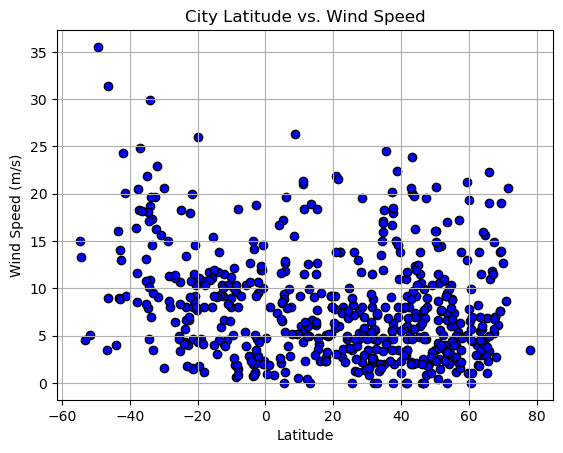

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot(x_values,y_values,lat,lng,ylabel,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, facecolor='teal',edgecolor='black')
    plt.title(title)
    plt.plot(x_values,regress_values,"r-")
    r_value = rvalue
    plt.annotate(f'{line_eq}\nR = {r_value:.2f}', (lat, lng), fontsize=10, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    plt.savefig(f"output_data/temp_vs_{ylabel}.png")


In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vila franca do campo,37.7167,-25.4333,71.89,99,100,17.96,PT,Fri Nov 10 20:10:44 2023
1,ribeira brava,32.6500,-17.0667,69.12,78,65,3.62,PT,Fri Nov 10 20:10:44 2023
2,benghazi,32.1167,20.0667,72.00,54,0,4.63,LY,Fri Nov 10 20:10:12 2023
4,san bernardo del viento,9.3533,-75.9524,82.17,85,100,5.19,CO,Fri Nov 10 20:11:38 2023
5,kolin,50.0281,15.2006,40.75,96,0,3.44,CZ,Fri Nov 10 20:10:44 2023


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port alfred,-33.5906,26.8910,65.17,91,43,7.00,ZA,Fri Nov 10 20:11:38 2023
6,waitangi,-43.9535,-176.5597,54.82,71,69,4.00,NZ,Fri Nov 10 20:11:38 2023
9,adamstown,-25.0660,-130.1015,73.17,79,1,10.67,PN,Fri Nov 10 20:11:39 2023
11,blackmans bay,-43.0167,147.3167,62.73,81,94,14.05,AU,Fri Nov 10 20:11:39 2023
13,singaraja,-8.1120,115.0882,85.21,65,100,1.50,ID,Fri Nov 10 20:11:39 2023


###  Temperature vs. Latitude Linear Regression Plot

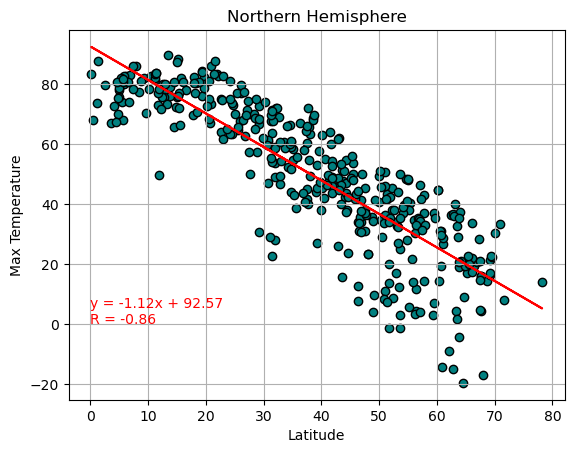

<Figure size 640x480 with 0 Axes>

In [92]:
# Linear regression on Northern Hemisphere
# Definig the values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot(x_values, y_values, 0, 0, "Max Temperature", 'Northern Hemisphere')


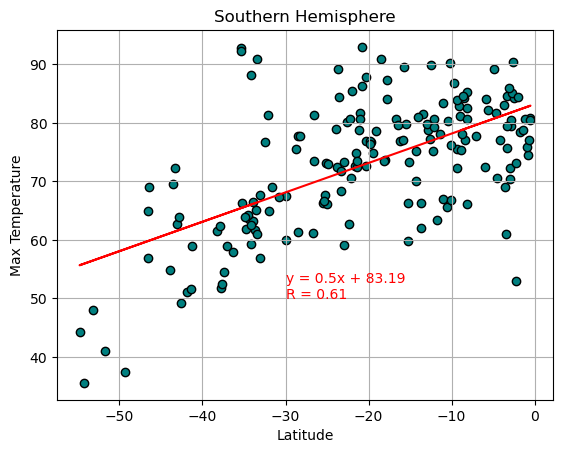

<Figure size 640x480 with 0 Axes>

In [109]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot(x_values, y_values, -30, 50, "Max Temperature", 'Southern Hemisphere')



**Discussion about the linear relationship:** 

In the North Hemisphere the linear reggresion canculation, indicates that there is a very negative relationship between max temperature and latitude.  Latitude could be a very good predictor of maximum temperature. It seems like the data in this hemsphere is consistent, meaning there isnt much variance in the results. 
In the South Hemisphere the linear regression calculation, indicates that there is a positive relationship between latitude and max temperature. It is indicating that the closer it is to the equator line the higher the temperatures are. Fot the south Hemisphere, the results seem to be more spread in the plot, indicating more variance that the results from the north Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

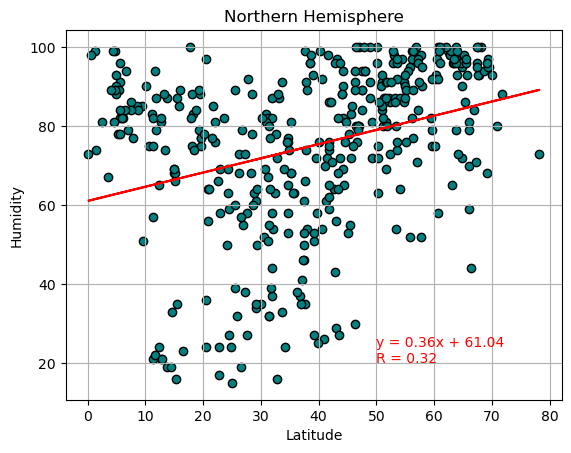

<Figure size 640x480 with 0 Axes>

In [90]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot(x_values, y_values, 50, 20, "Humidity", 'Northern Hemisphere')


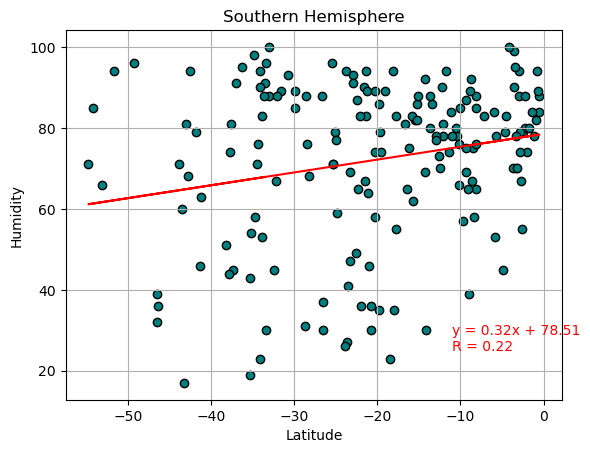

<Figure size 640x480 with 0 Axes>

In [116]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot(x_values, y_values, -11, 25, "Humidity", 'Southern Hemisphere')



**Discussion about the linear relationship:** 
In both plots, the linear regression shows a positive relationship between Altitude and Humidity, meaning the higher the altitude, the higher the temperature. However, the results do not idicate a strong relationship between the two factors indicating that there could be other factors that impact the humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

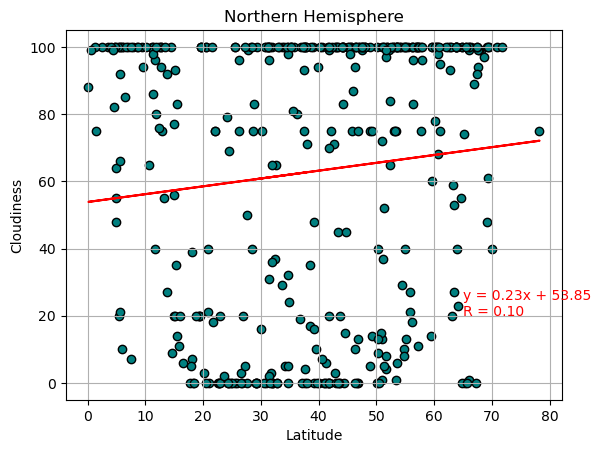

<Figure size 640x480 with 0 Axes>

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot(x_values, y_values, 65, 20, "Cloudiness", 'Northern Hemisphere')



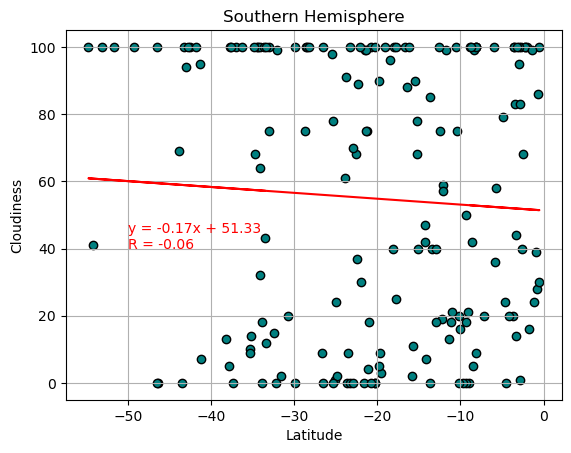

<Figure size 640x480 with 0 Axes>

In [100]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot(x_values, y_values, -50, 40, "Cloudiness", 'Southern Hemisphere')



**Discussion about the linear relationship:** 
In the North Hemisphere, the R value indicates that there is a very weak relationship between latitude and cloudiness. The R value is only 0.10 which is still a positive relationship but very small. The data also semms to show a high variability in the cloudiness. 
In the South Hemisphere, the R (-0.06) value also indicates a very weak relationship between latitude and cloudiness.
Cloudiness in both Hemispheres does not seem to be strongly affected by the latitude. 


### Wind Speed vs. Latitude Linear Regression Plot

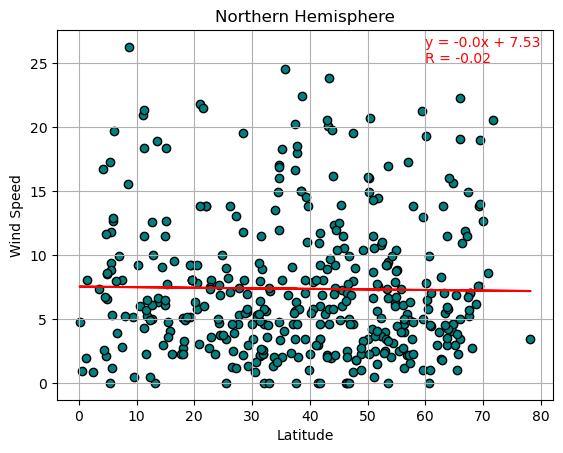

<Figure size 640x480 with 0 Axes>

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot(x_values, y_values, 60, 25, "Wind Speed", 'Northern Hemisphere')



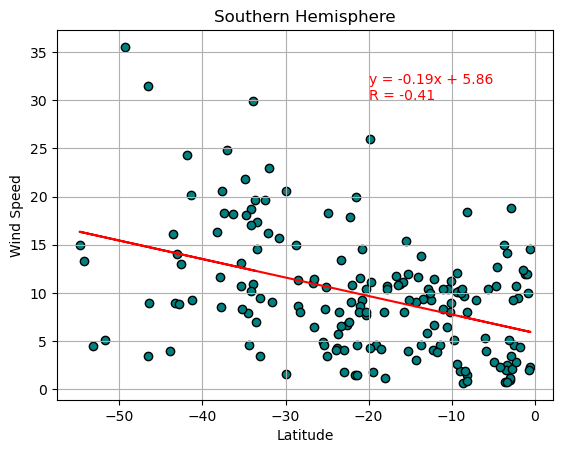

<Figure size 640x480 with 0 Axes>

In [108]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot(x_values, y_values, -20, 30, "Wind Speed", 'Southern Hemisphere')



**Discussion about the linear relationship:** 
In the northern hemosphere, the R value is 0.02, indicating a very weak positive correlation. This indicates that latitude is not a strong factor of wind speed.
In the southern hemosphereThe R value is -0.41, also indicating a negative correlation and it doesnt indicate that that wind speed is influenced by latitude. 
The spread of the data points in both plotes is very large, indicating that wind speed varies a lot and it is not necessarily influenced by latitude.